In [1]:
import datetime # Tipo de dato para fechas y horas
import pandas as pd # Manejo de datos tabulados
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos
import seaborn as sns # Graficos estadisticos
import pandas_profiling as ppr # ?????????
#import geopandas as gpd # Pandas para datos geograficos (Mapas!!)
from fitter import Fitter # Ajuste de distribuciones de probs

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('../Co2/CO2 Emissions_Canada.csv')

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape[0]

7385

- # Preguntas de exploración
1. ### ¿Cuales son los valores máximos y mínimos de emisión de Co2?
2. ### ¿Cuál es el grado de corelación entre la emision de Co2 y las otras variables?
3. ### ¿Cuál es la marca de auto con mayor número de unidades?


- # **Emisión de Co2 en vehículos marca Ford**
1. ### ¿Qué tipo de combustible usan los vehículos de la marca Ford?
2. ### ¿Cuál es el tipo de combustible(Fuel Type) predominante en los autos FORD que tienen más emisiones de CO2?
- # Impuesto por huella de carbono
- ## Hipótesis: 


### Respondiendo las preguntas generales 
 1. ### ¿Cuales son los valores máximos y mínimos de emisión de Co2?

In [6]:
df['CO2 Emissions(g/km)'].isna().sum(), df['CO2 Emissions(g/km)'].isna().sum() / df.shape[0]

(0, 0.0)

In [7]:
df['CO2 Emissions(g/km)'].describe()

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64

#### Se encontró que el valor mínimo es de 96(g/km) y el valor máximo es de 522(g/km)

### Una vez encontrado los valores máximos y mínimos, también tenemos la desviación estándar con lo que procederemos a agrupar las unidades a 3 desviaciones estándar.

In [8]:
rangos_co2 = [95, 154, 212, 270, 523]
co2_bins = pd.cut(df['CO2 Emissions(g/km)'], bins=rangos_co2)

rangos_co2_count= co2_bins.value_counts()

In [9]:
rangos_co2_count

(212, 270]    2795
(270, 523]    2521
(154, 212]    1892
(95, 154]      177
Name: CO2 Emissions(g/km), dtype: int64

In [10]:
df['co2_bins'] = co2_bins

In [11]:
conteo_co2_x_fuel = (df[['co2_bins', 'Fuel Type']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['co2_bins', 'Fuel Type']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_co2_x_fuel.head()

,co2_bins,Fuel Type,conteo
0,"(95, 154]",D,0
1,"(95, 154]",E,1
2,"(95, 154]",N,0
3,"(95, 154]",X,166
4,"(95, 154]",Z,10


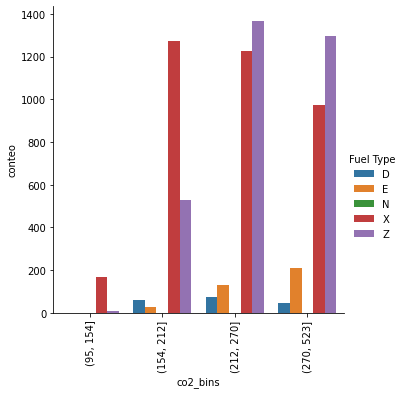

In [12]:
g = sns.catplot(
    data=conteo_co2_x_fuel, kind="bar",
    x="co2_bins", y="conteo", hue="Fuel Type",
)
g.set_xticklabels(rotation=90)
plt.show()

# Trabajando con la variable Engine Size(L)

In [13]:
df['Engine Size(L)'].describe()



count    7385.000000
mean        3.160068
std         1.354170
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine Size(L), dtype: float64

In [14]:
rangos_cil = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cil_bins = pd.cut(df['Engine Size(L)'], bins=rangos_cil)

cil_bins_count = cil_bins.value_counts()

In [15]:
cil_bins_count

(1, 2]    2432
(2, 3]    1776
(3, 4]    1661
(5, 6]     650
(4, 5]     546
(6, 7]     291
(0, 1]      21
(8, 9]       5
(7, 8]       3
Name: Engine Size(L), dtype: int64

<AxesSubplot:>

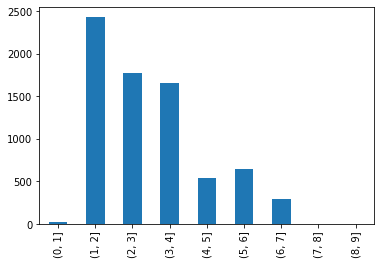

In [16]:
cil_bins_count.sort_index().plot(kind='bar')

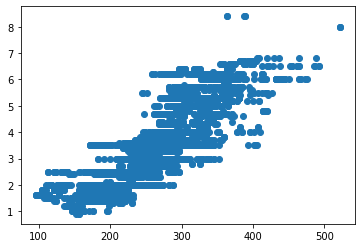

In [17]:
plt.scatter(x=df['CO2 Emissions(g/km)'], y=df['Engine Size(L)'])

In [18]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'co2_bins'],
      dtype='object')

In [19]:
df_vars = df[['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]

In [20]:
corr_matrix_var = ['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

len(corr_matrix_var)

8

2. ### ¿Cuál es el grado de corelación entre la emision de Co2 y las otras variables?

In [21]:
corr_matrix  = df_vars[corr_matrix_var].corr()
corr_matrix

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


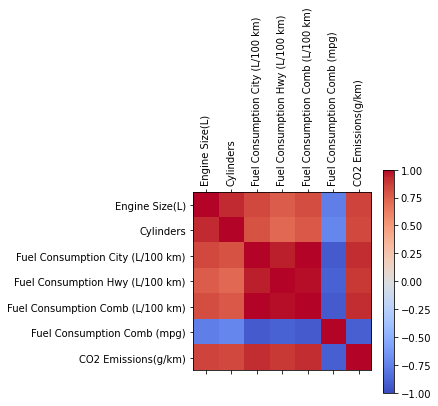

In [22]:
# Grafico de la matriz de correlacion

plt.rcParams['axes.grid'] = False  # Eliminar lineas dentro del grafico

plt.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Colocar nombres de variables en los ejes
plt.xticks(np.arange(corr_matrix.shape[0]), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(corr_matrix.shape[0]), corr_matrix.columns)

plt.colorbar() # Agregar un barra de colores como leyenda

plt.show()

#### Según lo encontrado, la mayor correlación (0.9195) se da entre el "consumo de combustible en ciudad(Fuel Consumption City (L/100 km)) " y las emisiones de CO2 (g/km)

## 3. ¿Cuál es la marca de auto con mayor número de unidades?

In [23]:
conteo_marca_cil = (df[['Make', 'Engine Size(L)']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['Make', 'Engine Size(L)']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_marca_cil.head()

,Make,Engine Size(L),conteo
0,ACURA,1.5,2
1,ACURA,2.0,6
2,ACURA,2.4,17
3,ACURA,3.0,4
4,ACURA,3.5,41


In [24]:
df_marca = df['Make'].value_counts()
df_marca

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

#### Aquí  se aprecia que la marca de autos con mayor unidades Ford, por lo que harémos un análisis de sus unidades.

In [25]:
conteo_co2_x_marca = (df[['co2_bins', 'Make']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['co2_bins', 'Make']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_co2_x_marca.head()

,co2_bins,Make,conteo
0,"(95, 154]",ACURA,2
1,"(95, 154]",ALFA ROMEO,0
2,"(95, 154]",ASTON MARTIN,0
3,"(95, 154]",AUDI,0
4,"(95, 154]",BENTLEY,0


In [26]:
conteo_co2_x_marca = conteo_co2_x_marca[conteo_co2_x_marca.conteo != 0]
conteo_co2_x_marca

,co2_bins,Make,conteo
0,"(95, 154]",ACURA,2
9,"(95, 154]",CHEVROLET,4
13,"(95, 154]",FORD,17
16,"(95, 154]",HONDA,20
17,"(95, 154]",HYUNDAI,21
...,...,...,...
163,"(270, 523]",SRT,2
164,"(270, 523]",SUBARU,10
165,"(270, 523]",TOYOTA,88
166,"(270, 523]",VOLKSWAGEN,13


- # **Emisión de Co2 en vehículos marca Ford**
 ### 1. ¿Qué tipo de combustible usan los vehículos de la marca Ford?

In [27]:
extraer_ford = df[df.Make == 'FORD']
extraer_ford

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),co2_bins
342,FORD,C-MAX HYBRID,FULL-SIZE,2.0,4,AV,X,5.6,6.4,6.0,47,138,"(95, 154]"
343,FORD,E150 VAN FFV,VAN - CARGO,4.6,8,A4,X,17.7,14.4,16.2,17,373,"(270, 523]"
344,FORD,E150 VAN FFV,VAN - CARGO,4.6,8,A4,E,24.1,19.2,21.9,13,350,"(270, 523]"
345,FORD,E150 VAN FFV,VAN - CARGO,5.4,8,A4,X,19.3,14.7,17.2,16,396,"(270, 523]"
346,FORD,E150 VAN FFV,VAN - CARGO,5.4,8,A4,E,24.9,19.6,22.5,13,360,"(270, 523]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840,FORD,Transit Connect Van LWB,SPECIAL PURPOSE VEHICLE,2.5,4,AS6,X,12.0,8.8,10.6,27,247,"(212, 270]"
6841,FORD,Transit Connect Wagon LWB,SPECIAL PURPOSE VEHICLE,2.0,4,AS8,X,9.9,8.2,9.2,31,214,"(212, 270]"
6842,FORD,Transit Connect Wagon LWB FFV,SPECIAL PURPOSE VEHICLE,2.0,4,AS8,X,9.9,8.2,9.2,31,214,"(212, 270]"
6843,FORD,Transit Connect Wagon LWB FFV,SPECIAL PURPOSE VEHICLE,2.0,4,AS8,E,13.7,11.1,12.5,23,208,"(154, 212]"


In [28]:
ford_co2_x_fuel = (extraer_ford[['co2_bins', 'Fuel Type']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['co2_bins', 'Fuel Type']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
ford_co2_x_fuel.head()

,co2_bins,Fuel Type,conteo
0,"(95, 154]",D,0
1,"(95, 154]",E,0
2,"(95, 154]",X,17
3,"(95, 154]",Z,0
4,"(154, 212]",D,0


In [29]:
ford_co2_x_fuel_sina = ford_co2_x_fuel[ford_co2_x_fuel.conteo != 0]
ford_co2_x_fuel_sina

,co2_bins,Fuel Type,conteo
2,"(95, 154]",X,17
5,"(154, 212]",E,17
6,"(154, 212]",X,74
8,"(212, 270]",D,9
9,"(212, 270]",E,42
10,"(212, 270]",X,187
11,"(212, 270]",Z,3
12,"(270, 523]",D,5
13,"(270, 523]",E,52
14,"(270, 523]",X,211


2. ### ¿Cuál es el tipo de combustible(Fuel Type) predominante en los autos FORD que tienen más emisiones de CO2?

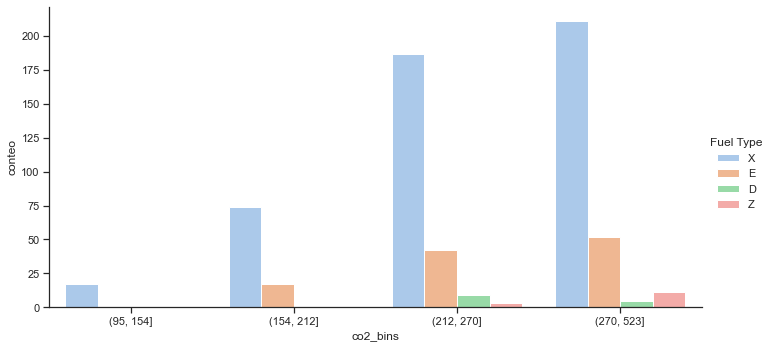

In [30]:
#Graficando el número de vehículos con más emisión de CO2 según el tipo de combustible
sns.set_theme(style="ticks", palette="pastel")
g1 = sns.catplot(
    data=ford_co2_x_fuel_sina, kind="bar",
    x="co2_bins", y="conteo", hue="Fuel Type", aspect=2
)
g.set_xticklabels(rotation=90)
plt.show()

In [31]:
ford_co2_x_fuel_x_cylinders = (extraer_ford[['co2_bins', 'Fuel Type', 'Cylinders']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['co2_bins', 'Fuel Type', 'Cylinders']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
ford_co2_x_fuel_x_cylinders.head()

,co2_bins,Fuel Type,Cylinders,conteo
0,"(95, 154]",D,3,0
1,"(95, 154]",D,4,0
2,"(95, 154]",D,6,0
3,"(95, 154]",D,8,0
4,"(95, 154]",D,10,0


In [32]:
#Conteo de vehículos que emiten co2 según tipo de combustible y cilindros
ford_co2_x_fuel_x_cylinders_sina = ford_co2_x_fuel_x_cylinders[ford_co2_x_fuel_x_cylinders.conteo != 0]
ford_co2_x_fuel_x_cylinders_sina

,co2_bins,Fuel Type,Cylinders,conteo
10,"(95, 154]",X,3,2
11,"(95, 154]",X,4,15
26,"(154, 212]",E,4,17
30,"(154, 212]",X,3,13
31,"(154, 212]",X,4,61
42,"(212, 270]",D,6,9
46,"(212, 270]",E,4,10
47,"(212, 270]",E,6,32
51,"(212, 270]",X,4,135
52,"(212, 270]",X,6,51


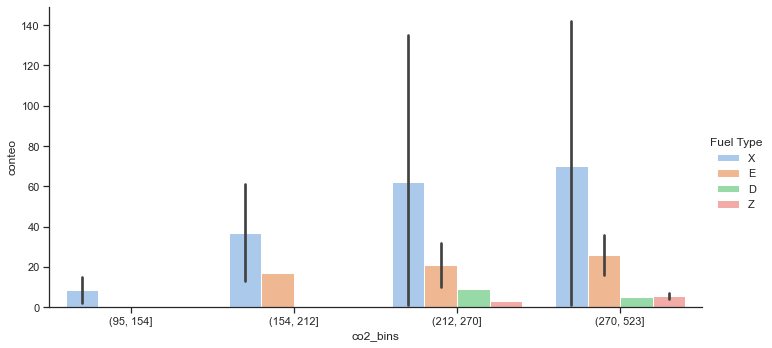

In [33]:
sns.set_theme(style="ticks", palette="pastel")
g2 = sns.catplot(
    data=ford_co2_x_fuel_x_cylinders_sina, kind="bar",
    x="co2_bins", y="conteo", hue="Fuel Type", aspect=2
)
g.set_xticklabels(rotation=90)
plt.show()

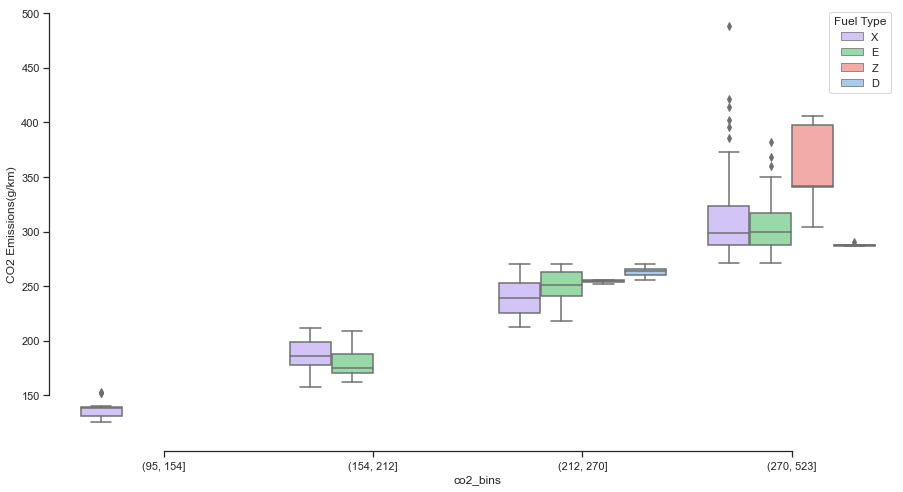

In [34]:
plt.figure(figsize = (15,8))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="co2_bins", y="CO2 Emissions(g/km)",
            hue="Fuel Type", palette=["m", "g","r","b"],
            data=extraer_ford)
sns.despine(offset=10, trim=True)

In [35]:
#import plotly.express as px
#import plotly.graph_objects as go

#from plotly.subplots import make_subplots

In [36]:
#Crear pandas profiling
#profile2 = ppr.ProfileReport(extraer_ford, title='Pandas Profiling Report', minimal=True)
#profile2.to_file('../Co2/Ford_Co2.html')